## Predicting future demand for product optimization
                        
1. Analyze historical data
2. Customer demography, purchase history and preferences
3. Prevent stockout
4. Prevent lost sales
5. Prevent increased inventory cost

This is a dataset containing information about the business activities of a retail supermarket in the
United states. The dataset was gotten from kaggle

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('white')

In [4]:
#loading the data
retail_sales = pd.read_csv('SampleSuperstore.csv')
# making a copy of the dataset
data = retail_sales.copy()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#checking the shape of the data
data.shape

(9994, 13)

The data consists of 13 features and 9994 observations with the information of a retail supermarket in
different parts of the united states The features are

1. Ship mode: The type of shipping a customer prefers when he/she makes a purchase
2. segment: the category of customer who made the purchase
3. city and state: The city and state where the customer made the purchase
4. Region: the region in the US where the customer made the purchase from
5. category and sub-category: the category and sub-category of product a customer purchased
6. sales: the amount realised from the sale of products after the discount has been deducted
7. quantity: the unit of product purchased
8. discount given to customers for each sale
9. profit realized from each sale

In [6]:
#checking for duplicated observations
data.duplicated().sum()

17

In [7]:
#removing duplicated observations and reseting the index
data = data.drop_duplicates()
data.reset_index(drop= True, inplace= True)
print(data.shape)
data.head()

(9977, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
#checking for missing values
print(data.isna().sum().sum())
data.isna().sum()


0


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data.columns= ['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
 'region', 'category', 'sub_category', 'disc_total_sales', 'quantity', 'discount',
 'profit']

In [14]:
for col, d_type in zip(data.columns, data.dtypes):
        unq_vals = data[col].unique()
        print(col,' ', unq_vals, ' ', d_type)
        print(' ')

ship_mode   ['Second Class' 'Standard Class' 'First Class' 'Same Day']   object
 
segment   ['Consumer' 'Corporate' 'Home Office']   object
 
country   ['United States']   object
 
city   ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San 

There are feautures with high and low cardinality that will not be useful for the prediction. Features with
too many or too little unique values tends to introduce noise to a model and make the prediction bias.
These features include city, postal code and country and will be dropped

In [15]:
#dropping features with high and low cardinality
data= data.drop(columns=['city', 'postal_code', 'country'])
data.head()

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
# adding a new feature 'actual total sales to get the total sales price before discount on pur
data['actual_total_sales']= data.disc_total_sales / (1 - data.discount)
data.head()


,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96


In [18]:
# adding a new feature 'unit sales' to get the unit sales price before discount on purchase
data['unit_sale']= data.actual_total_sales / data.quantity
data.head()

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96,130.98
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94,243.98
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62,7.31
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05,348.21
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96,13.98


In [19]:
# adding a new feature to the data frame to reflect the discount price of each purchase
data['disc_price']= data.actual_total_sales * data.discount
data.head()

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96,130.98,0.0000
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94,243.98,0.0000
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62,7.31,0.0000
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05,348.21,783.4725
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96,13.98,5.5920


In [20]:
# getting the total quantity purchased for each product 
sub_cat_segment= data.groupby('sub_category')['quantity'].sum().reset_index()
sub_cat_segment= pd.DataFrame(sub_cat_segment)
sub_cat_segment

,sub_category,quantity
0,Accessories,2976
1,Appliances,1729
2,Art,2996
3,Binders,5971
4,Bookcases,868
5,Chairs,2351
6,Copiers,234
7,Envelopes,906
8,Fasteners,914
9,Furnishings,3560


In [21]:
# creating a feature for the total quantity of each product
data = data.merge(sub_cat_segment, on='sub_category')
data.head()

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity_x,discount,profit,actual_total_sales,unit_sale,disc_price,quantity_y
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96,130.98,0.0000,868
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94,243.98,0.0000,2351
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62,7.31,0.0000,1396
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05,348.21,783.4725,1241
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96,13.98,5.5920,3158


In [23]:
data.columns= ['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category',
 'disc_total_sales', 'quantity', 'discount', 'profit',
 'actual_total_sales', 'unit_sale', 'disc_price',
 'total_quantity']

data.head()


,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96,130.98,0.0000,868
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94,243.98,0.0000,2351
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62,7.31,0.0000,1396
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05,348.21,783.4725,1241
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96,13.98,5.5920,3158


array([[<Axes: title={'center': 'disc_total_sales'}>,
        <Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'discount'}>],
       [<Axes: title={'center': 'profit'}>,
        <Axes: title={'center': 'actual_total_sales'}>,
        <Axes: title={'center': 'unit_sale'}>],
       [<Axes: title={'center': 'disc_price'}>,
        <Axes: title={'center': 'total_quantity'}>, <Axes: >]],
      dtype=object)

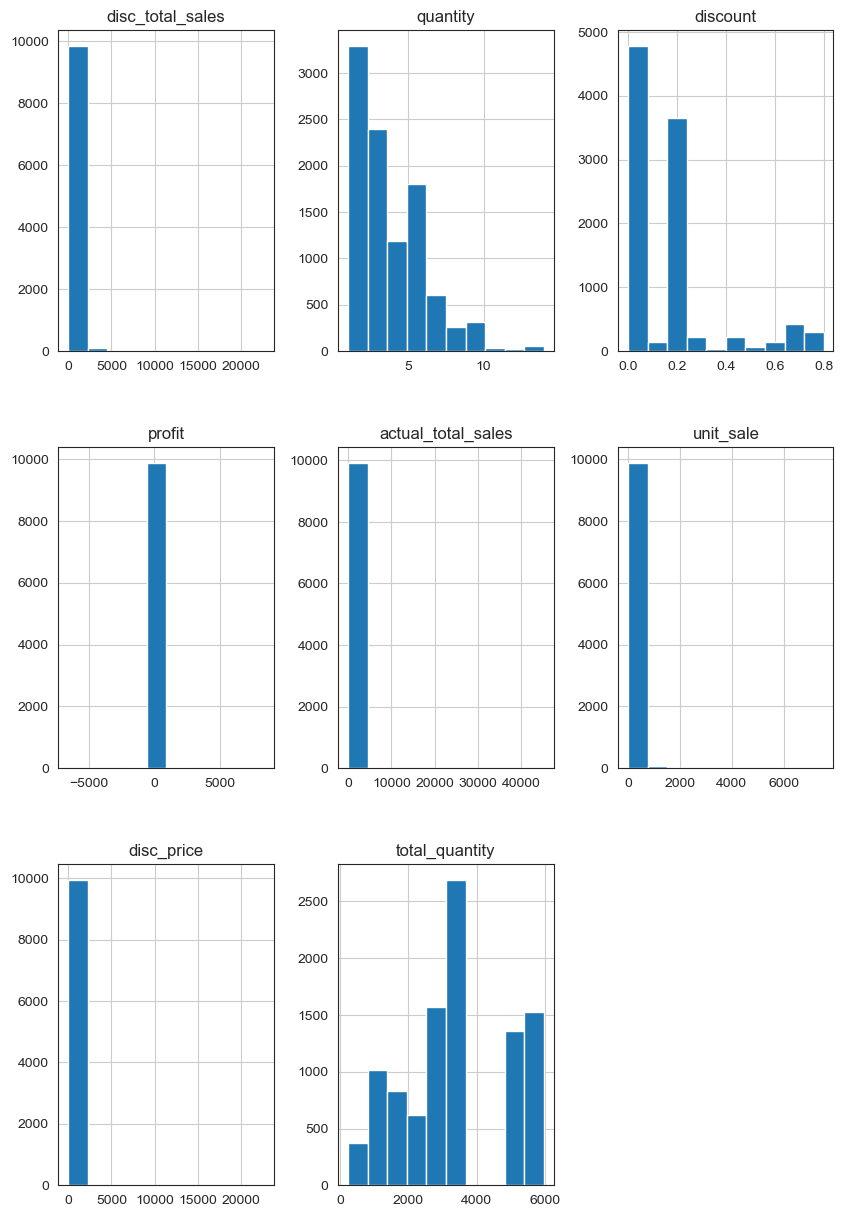

In [24]:
#checking the distribution of numerical features using a histogram plot
data.hist(figsize=(10, 15))

C:\Users\User\AppData\Local\Temp\ipykernel_9512\3910693433.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax, kind= 'box', subplots= True, layout=(5,2), sharex= False, sharey= False, vert= False)


disc_total_sales         Axes(0.125,0.747241;0.352273x0.132759)
quantity              Axes(0.547727,0.747241;0.352273x0.132759)
discount                 Axes(0.125,0.587931;0.352273x0.132759)
profit                Axes(0.547727,0.587931;0.352273x0.132759)
actual_total_sales       Axes(0.125,0.428621;0.352273x0.132759)
unit_sale             Axes(0.547727,0.428621;0.352273x0.132759)
disc_price                Axes(0.125,0.26931;0.352273x0.132759)
total_quantity         Axes(0.547727,0.26931;0.352273x0.132759)
dtype: object

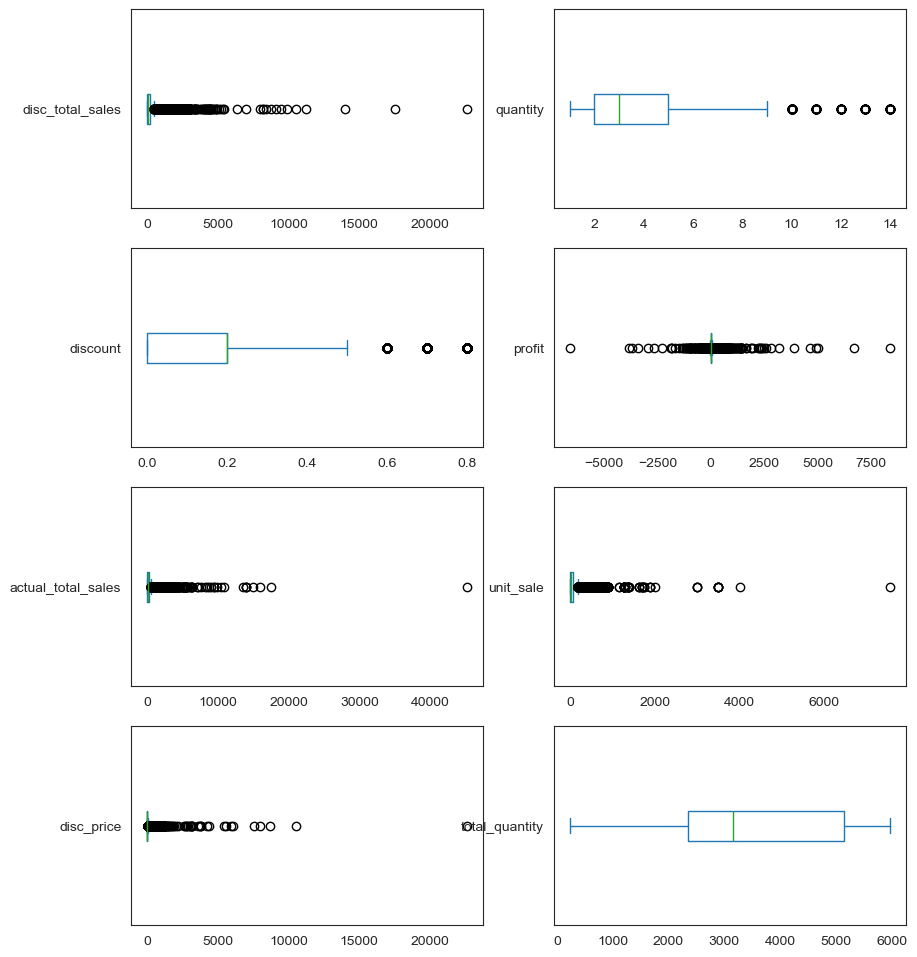

In [25]:
#checking the distribution and potential outliers of numerical features using a box plot
fig, ax = plt.subplots(figsize= (10, 15))
data.plot(ax=ax, kind= 'box', subplots= True, layout=(5,2), sharex= False, sharey= False, vert= False)

The histogram plot shows that the numerical features are not evenly distributed with the exception of
the profit feature with a little skew to the right and boxplots suggests all numerical feaures have outliers.
The descriptive statistics will tell us more about the distribution of the features


In [26]:
# checking the descriptive statistics of numerical features
data.describe()

,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
count,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000,9977.000000,9977.000000,9977.000000
mean,230.148902,3.790719,0.156278,28.69013,286.937213,75.655195,56.788311,3381.351208
std,623.721409,2.226657,0.206455,234.45784,864.770457,189.099032,361.187392,1644.506520
min,0.444000,1.000000,0.000000,-6599.97800,0.990000,0.990000,0.000000,234.000000
25%,17.300000,2.000000,0.000000,1.72620,21.360000,6.480000,0.000000,2351.000000
50%,54.816000,3.000000,0.200000,8.67100,65.120000,19.980000,1.338000,3158.000000
75%,209.970000,5.000000,0.200000,29.37200,251.980000,76.980000,24.064000,5144.000000
max,22638.480000,14.000000,0.800000,8399.97600,45276.960000,7546.160000,22638.480000,5971.000000


The sales feature is highly skewed to the right and contains outliers with higher prices pulling up the
mean of the distribution. The quantity and discount features have a relatively lower right skew with a few
outliers. The profit feature is normally distributed with outliers on both sides. The outliers will be
investigated to know their effect on the features


In [27]:
# the sales data has a large value at over #22k dollars. checking the info of this sales
data[data.disc_total_sales == 22638.480000 ]

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
2696,Standard Class,Home Office,Florida,South,Technology,Machines,22638.48,6,0.5,-1811.0784,45276.96,7546.16,22638.48,440


In [28]:
#creating a data frame for the machines sub category to analyze the price distribution
mach_df = data[data.sub_category== 'Machines']
mach_df

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
165,Standard Class,Consumer,Texas,Central,Technology,Machines,8159.952,8,0.4,-1359.9920,13599.92,1699.99,5439.968,440
215,Standard Class,Corporate,Ohio,East,Technology,Machines,1188.000,9,0.7,-950.4000,3960.00,440.00,2772.000,440
223,First Class,Consumer,Ohio,East,Technology,Machines,479.988,4,0.7,-383.9904,1599.96,399.99,1119.972,440
262,Second Class,Corporate,Texas,Central,Technology,Machines,3059.982,3,0.4,-509.9970,5099.97,1699.99,2039.988,440
263,Second Class,Corporate,Texas,Central,Technology,Machines,2519.958,7,0.4,-251.9958,4199.93,599.99,1679.972,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,Second Class,Consumer,California,West,Technology,Machines,4476.800,4,0.2,503.6400,5596.00,1399.00,1119.200,440
9389,First Class,Home Office,Illinois,Central,Technology,Machines,574.910,2,0.3,156.0470,821.30,410.65,246.390,440
9439,Second Class,Home Office,Tennessee,South,Technology,Machines,91.475,1,0.5,-1.8295,182.95,182.95,91.475,440
9545,First Class,Consumer,Ohio,East,Technology,Machines,224.937,3,0.7,-164.9538,749.79,249.93,524.853,440


In [29]:
#checking the statistics for the machines sub category
mach_df.describe()


,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.00000,115.000000,115.0
mean,1645.553313,3.826087,0.306087,29.432669,2505.091478,641.25313,859.538165,440.0
std,2765.102088,2.165361,0.252804,1099.070067,4938.688449,955.13551,2534.507186,0.0
min,11.560000,1.000000,0.000000,-6599.978000,14.450000,13.11000,0.000000,440.0
25%,287.939000,2.000000,0.050000,-104.609750,472.410000,154.99000,1.445000,440.0
50%,599.985000,3.000000,0.200000,38.997400,1035.800000,379.99000,191.988000,440.0
75%,2120.938000,5.000000,0.500000,219.525650,2896.980000,688.30000,643.070000,440.0
max,22638.480000,11.000000,0.700000,2799.984000,45276.960000,7546.16000,22638.480000,440.0


there are a few observations for sale price with extremely large values and might lead to bias in
prediction, these values will be removed

In [30]:
# checking the observation with the highest profit. most observation have a relative lower pro
data[data.profit == 8399.97600 ]

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
6817,Standard Class,Corporate,Indiana,Central,Technology,Copiers,17499.95,5,0.0,8399.976,17499.95,3499.99,0.0,234


In [31]:
# checking for profits beyond $1k 
data[data.profit >= 1000]

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
318,Standard Class,Home Office,New York,East,Technology,Machines,3991.980,2,0.0,1995.9900,3991.98,1995.99,0.000,440
353,First Class,Home Office,New York,East,Office Supplies,Binders,4355.168,4,0.2,1415.4296,5443.96,1360.99,1088.792,5971
509,Standard Class,Consumer,Georgia,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,6354.95,1270.99,0.000,5971
515,Standard Class,Home Office,Montana,West,Technology,Copiers,2999.950,5,0.0,1379.9770,2999.95,599.99,0.000,234
993,Standard Class,Corporate,Virginia,South,Office Supplies,Binders,2715.930,7,0.0,1276.4871,2715.93,387.99,0.000,5971
1084,Standard Class,Consumer,New York,East,Technology,Machines,4899.930,7,0.0,2400.9657,4899.93,699.99,0.000,440
1453,First Class,Corporate,Alabama,South,Technology,Machines,3040.000,8,0.0,1459.2000,3040.00,380.00,0.000,440
1643,First Class,Corporate,Washington,West,Technology,Copiers,3149.930,7,0.0,1480.4671,3149.93,449.99,0.000,234
2181,Standard Class,Consumer,New York,East,Technology,Machines,3999.950,5,0.0,1159.9855,3999.95,799.99,0.000,440
2491,Standard Class,Consumer,New York,East,Technology,Phones,4548.810,7,0.0,1228.1787,4548.81,649.83,0.000,3289


In [32]:
# checking the range of losses
data[data.profit < -500]

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
27,Standard Class,Consumer,Pennsylvania,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522,6166.86,880.98,3083.430,868
165,Standard Class,Consumer,Texas,Central,Technology,Machines,8159.952,8,0.4,-1359.9920,13599.92,1699.99,5439.968,440
215,Standard Class,Corporate,Ohio,East,Technology,Machines,1188.000,9,0.7,-950.4000,3960.00,440.00,2772.000,440
262,Second Class,Corporate,Texas,Central,Technology,Machines,3059.982,3,0.4,-509.9970,5099.97,1699.99,2039.988,440
463,Standard Class,Home Office,Arizona,West,Furniture,Tables,1272.630,6,0.5,-814.4832,2545.26,424.21,1272.630,1241
683,Same Day,Corporate,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904,15999.96,3999.99,7999.980,440
869,First Class,Home Office,Pennsylvania,East,Office Supplies,Binders,1141.470,5,0.7,-760.9800,3804.90,760.98,2663.430,5971
949,Standard Class,Home Office,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960,3442.20,286.85,1376.880,1241
1198,Standard Class,Consumer,Texas,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464,5443.96,1360.99,4355.168,5971
1368,Standard Class,Consumer,Colorado,West,Furniture,Bookcases,590.058,7,0.7,-786.7440,1966.86,280.98,1376.802,868


In [33]:
#creating a data frame for the binders sub category to analyze the price distribution
binder_df = data[data.sub_category == 'Binders']
binder_df

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
8,Standard Class,Consumer,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825,23.13,7.71,4.626,5971
13,Standard Class,Consumer,Washington,West,Office Supplies,Binders,407.976,3,0.2,132.5922,509.97,169.99,101.994,5971
15,Standard Class,Home Office,Texas,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160,12.72,4.24,10.176,5971
20,Second Class,Consumer,California,West,Office Supplies,Binders,22.720,4,0.2,7.3840,28.40,7.10,5.680,5971
25,Second Class,Consumer,California,West,Office Supplies,Binders,11.648,2,0.2,4.2224,14.56,7.28,2.912,5971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Standard Class,Consumer,New Jersey,East,Office Supplies,Binders,40.200,5,0.0,18.0900,40.20,8.04,0.000,5971
9951,Standard Class,Consumer,New Jersey,East,Office Supplies,Binders,735.980,2,0.0,331.1910,735.98,367.99,0.000,5971
9953,Standard Class,Home Office,Georgia,South,Office Supplies,Binders,119.560,2,0.0,54.9976,119.56,59.78,0.000,5971
9961,Standard Class,Home Office,California,West,Office Supplies,Binders,13.376,4,0.2,4.6816,16.72,4.18,3.344,5971


In [34]:
#checking the statistics for the machines sub category
binder_df.describe()


,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.0
mean,133.645972,3.923127,0.372011,19.860710,217.949435,56.444166,84.303463,5971.0
std,563.426449,2.292544,0.310847,306.296682,833.228309,190.675711,464.986159,0.0
min,0.556000,1.000000,0.000000,-3701.892800,1.680000,1.680000,0.000000,5971.0
25%,8.140500,2.000000,0.200000,-6.022575,16.025000,5.190000,1.593000,5971.0
50%,18.574000,3.000000,0.200000,3.977100,34.440000,8.880000,8.420000,5971.0
75%,51.872750,5.000000,0.700000,15.841150,89.520000,24.420000,28.060000,5971.0
max,9892.740000,14.000000,0.800000,4946.370000,10887.920000,1889.990000,8710.336000,5971.0


In [35]:
len(binder_df[binder_df.unit_sale > 500])


47

The product binders have prices above 500, which is very unusual for such a product . All unit price
beyond $500 will be removed using the quantile method. The upper limit for the quantile will be set to
99% to prevent losing many data points and making sure only extreme values that significantly vary from
other data points are removed


In [36]:
# setting the values for upper and lower quantile to remove values beyond 90%
low, high= data.unit_sale.quantile([0.00,0.99])
print(low)
print(high)

0.9899999999999999
699.9899999999999


In [37]:
# removing values that beyond the 90th quantile
data_1= data.copy()
data_1= data_1[data_1.unit_sale.between(low, high)]
print(data_1.shape)
data_1.head()

(9878, 14)


,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96,130.98,0.0000,868
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94,243.98,0.0000,2351
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62,7.31,0.0000,1396
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05,348.21,783.4725,1241
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96,13.98,5.5920,3158


In [38]:
# checking the descriptive statistics
data_1.describe()

,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
count,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000
mean,194.208407,3.788115,0.155226,24.877901,235.027016,62.807900,40.818609,3387.269387
std,369.797712,2.228642,0.205445,111.670345,443.846999,99.113083,126.432842,1630.779203
min,0.444000,1.000000,0.000000,-1862.312400,0.990000,0.990000,0.000000,234.000000
25%,17.088000,2.000000,0.000000,1.749375,21.120000,6.480000,0.000000,2351.000000
50%,52.768000,3.000000,0.200000,8.596500,63.890000,19.840000,1.310000,3158.000000
75%,201.580000,5.000000,0.200000,28.813350,241.960000,70.980000,23.058000,5144.000000
max,5399.910000,14.000000,0.800000,2591.956800,7162.740000,699.990000,2865.096000,5971.000000


The few observations with relatuvely high profit/loss represent genuine data points and will not be
treated as outliers


In [40]:
for col in data.select_dtypes(include='number').columns:
    q3, q1 = np.percentile(data[col], [75,25])
    iqr = q3 - q1
    upper_lim = q3 + 1.5 * iqr
    lower_lim = q1 - 1.5 * iqr
    
    total_outliers = len(data.loc[data[col] > upper_lim]) + len(data.loc[data[col] < lower_lim])
    percent_outliers = (total_outliers/len(data))*100

    print('column:', col)
    print('upper limit:', upper_lim)
    print('lower limit:', lower_lim)
    print('total outliers:', total_outliers)
    print('percent outliers:', percent_outliers)
    print('---------------------------')
    print(' ')
    

column: disc_total_sales
upper limit: 498.975
lower limit: -271.705
total outliers: 1167
percent outliers: 11.696902876616218
---------------------------
 
column: quantity
upper limit: 9.5
lower limit: -2.5
total outliers: 170
percent outliers: 1.7039190137315827
---------------------------
 
column: discount
upper limit: 0.5
lower limit: -0.30000000000000004
total outliers: 855
percent outliers: 8.569710333767667
---------------------------
 
column: profit
upper limit: 70.8407
lower limit: -39.7425
total outliers: 1881
percent outliers: 18.853362734288865
---------------------------
 
column: actual_total_sales
upper limit: 597.91
lower limit: -324.57
total outliers: 1201
percent outliers: 12.037686679362535
---------------------------
 
column: unit_sale
upper limit: 182.73000000000002
lower limit: -99.27
total outliers: 1025
percent outliers: 10.273629347499249
---------------------------
 
column: disc_price
upper limit: 60.160000000000004
lower limit: -36.096000000000004
total o

In [41]:
# peaking at the data
print(data_1.shape)
data_1.head()

(9878, 14)


,ship_mode,segment,state,region,category,sub_category,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price,total_quantity
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.96,130.98,0.0000,868
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,731.94,243.98,0.0000,2351
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,14.62,7.31,0.0000,1396
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1741.05,348.21,783.4725,1241
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,27.96,13.98,5.5920,3158


In [42]:
# checking the description of categorical features
data_1.select_dtypes('object').describe()

,ship_mode,segment,state,region,category,sub_category
count,9878,9878,9878,9878,9878,9878
unique,4,3,49,4,3,17
top,Standard Class,Consumer,California,West,Office Supplies,Binders
freq,5901,5125,1982,3172,5964,1483


The standard class is the most used shipping mode. Most customers are consumers from the state of
california. The category with the highest purchase is office suppliers with the binders sub category

In [44]:
# checking for the count of values in each categorical feature
for col in data_1.select_dtypes('object').columns:
 print(data_1[col].value_counts())
 print(' ')

ship_mode
Standard Class    5901
Second Class      1924
First Class       1517
Same Day           536
Name: count, dtype: int64
 
segment
Consumer       5125
Corporate      2989
Home Office    1764
Name: count, dtype: int64
 
state
California              1982
New York                1110
Texas                    971
Pennsylvania             578
Washington               498
Illinois                 488
Ohio                     464
Florida                  380
Michigan                 249
North Carolina           245
Arizona                  224
Virginia                 221
Georgia                  181
Colorado                 180
Tennessee                180
Indiana                  148
Kentucky                 138
Massachusetts            135
New Jersey               128
Oregon                   123
Wisconsin                110
Maryland                 104
Delaware                  95
Minnesota                 87
Connecticut               82
Oklahoma                  66
Missouri      

## Statistical analysis: Analysing the relationship between Quantity(target) and sales, discont, unit cost, total cost (predictors)

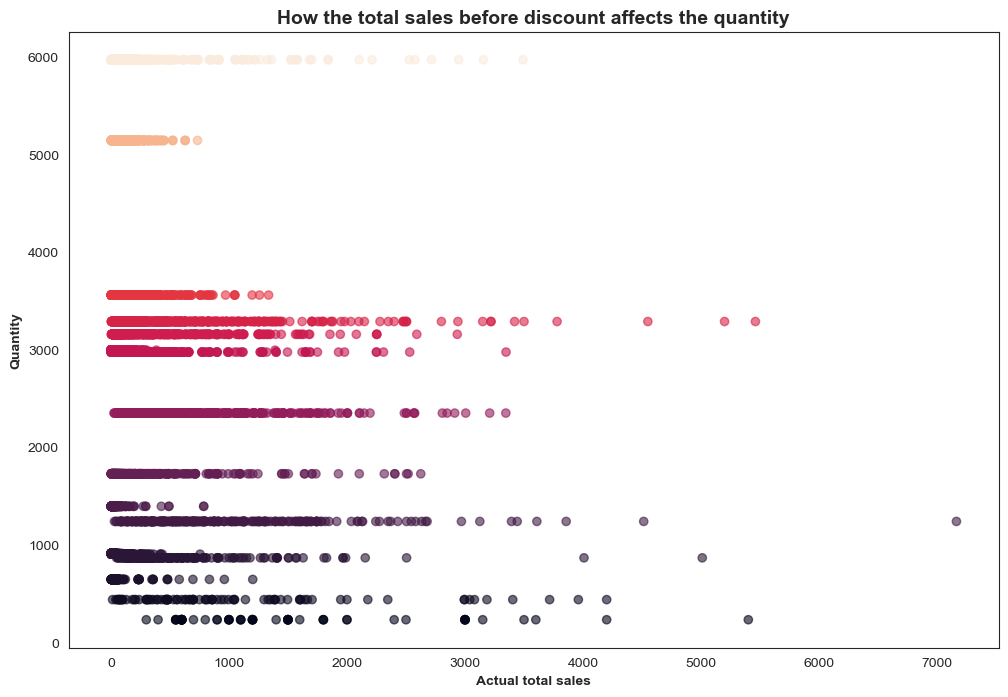

In [56]:
# Creating a scatter that shows the relationship between the actual total sales before the dis
plt.figure(figsize= (12, 8))
plt.scatter(data_1['actual_total_sales'], data_1['total_quantity'], alpha= 0.6, c= data_1['total_quantity'])
plt.title('How the total sales before discount affects the quantity', fontsize=14, fontweight='bold')
plt.xlabel('Actual total sales', weight= 'bold')
plt.ylabel('Quantity', weight= 'bold')
plt.show()

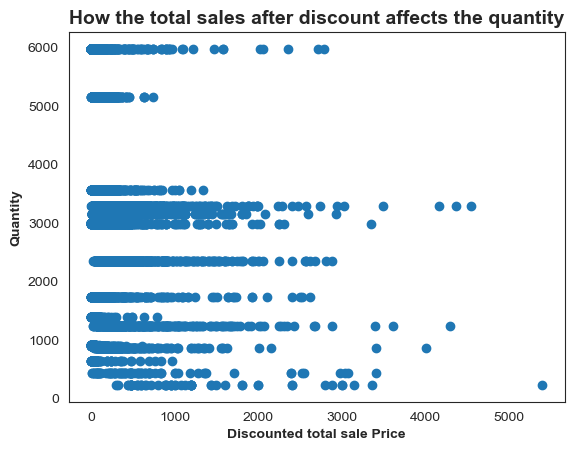

In [64]:
# Creating a scatter that shows the relationship between the actual total sales after the disc
#plt.figure(figsize= (12, 8))
plt.scatter(data_1.disc_total_sales, data_1.total_quantity)#, alpha= 0.6, c= data_1.disc_total_sales)
plt.title('How the total sales after discount affects the quantity', fontsize=14, fontweight= 'bold')
plt.xlabel('Discounted total sale Price', weight= 'bold')
plt.ylabel('Quantity' , weight= 'bold')
plt.show()

The scatter plot shows a positive correlation between the unit sale for each product and the total
quantity purchased. However, this trend is not perfectly linear.
There is a cluster of points in the lower left corner, indicating that a significant number of products have
low unit sales and low quantities sold.
As we move towards the right (higher unit sales), the points spread out, suggesting that there is more
variation in the quantity sold for products with higher prices.
There are a few outliers on the right side of the plot, representing products with high unit sales but
relatively low quantities sold. These could be niche or luxury products.
high discounts were given on some purchase quantity which led to a lower revenue
Frequent discounts can diminish the perceived value of a product

## correlation

In [65]:
# checking the correlation between the predictors
corr = data_1.select_dtypes('number').drop(columns=['total_quantity']).corr()
corr

,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price
disc_total_sales,1.000000,0.298586,-0.061735,0.522012,0.968008,0.783907,0.473371
quantity,0.298586,1.000000,0.006275,0.135673,0.296757,-0.013114,0.168456
discount,-0.061735,0.006275,1.000000,-0.317275,0.047560,0.063849,0.347526
profit,0.522012,0.135673,-0.317275,1.000000,0.333767,0.271166,-0.355107
actual_total_sales,0.968008,0.296757,0.047560,0.333767,1.000000,0.816413,0.679253
unit_sale,0.783907,-0.013114,0.063849,0.271166,0.816413,1.000000,0.573234
disc_price,0.473371,0.168456,0.347526,-0.355107,0.679253,0.573234,1.000000


<Axes: >

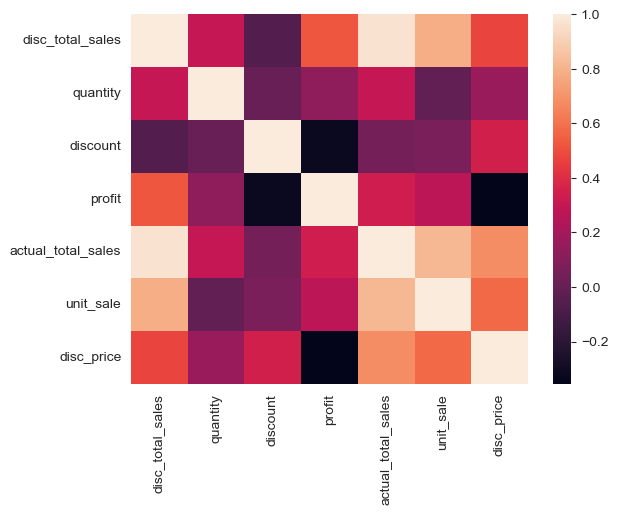

In [66]:
# visualizing the correlation between predictors using a heatmap
sb.heatmap(corr)


There is a pretty high correlation between discount total sales, actual total sales and unit sales. They
represent the same variable in different forms. The actual total sales feature will be dropped as it is the
least relevant feature for predicting the future demand of products. The unit sales feature will be used as
it gives information about the value of products which greatly affects purchase. The discounted total
sales feature will also be used because it gives information about how the discount influences sale price
and quantity purchased
The feature profit will not be relevant in predicting the future demand of products. This is because profit
can only be realized after the product is purchased. using the profit to predict future demand will lead to
data leakage in our prediction. hence, the profit feature will be removed
Out[48]: In [49]: Out[49]:
Even though the discount amount given for each purchase is important in predicting the future demand.
the discount percentage does not give accurate information that will enable prediction. The discount
percentage feature will be removed and only the discount amount feature will be used


In [67]:
# dropping columns that are irrelevant in predicting future demand of products
irr_feat= ['actual_total_sales', 'profit', 'discount']
data_1= data_1.drop(columns= irr_feat)


In [69]:
# checking the correlation after dropping features that are highly correlated
corr = data_1.select_dtypes('number').drop(columns=['total_quantity']).corr()
corr


,disc_total_sales,quantity,unit_sale,disc_price
disc_total_sales,1.000000,0.298586,0.783907,0.473371
quantity,0.298586,1.000000,-0.013114,0.168456
unit_sale,0.783907,-0.013114,1.000000,0.573234
disc_price,0.473371,0.168456,0.573234,1.000000


<Axes: >

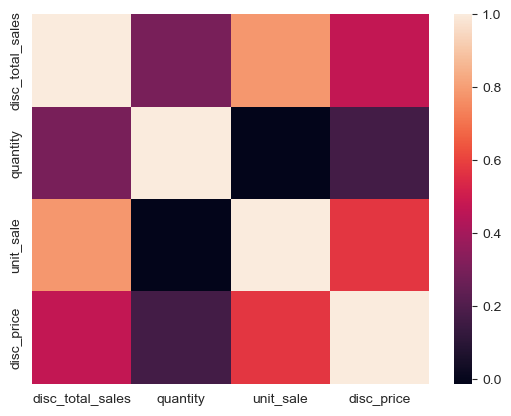

In [70]:
# visualizing the correlation using a heatmap
sb.heatmap(corr)


             state  total_quantity
3       California         6615328
30        New York         3765402
41           Texas         3288659
36    Pennsylvania         1962042
45      Washington         1686302
11        Illinois         1666596
33            Ohio         1565953
8          Florida         1320846
20        Michigan          853481
31  North Carolina          830446


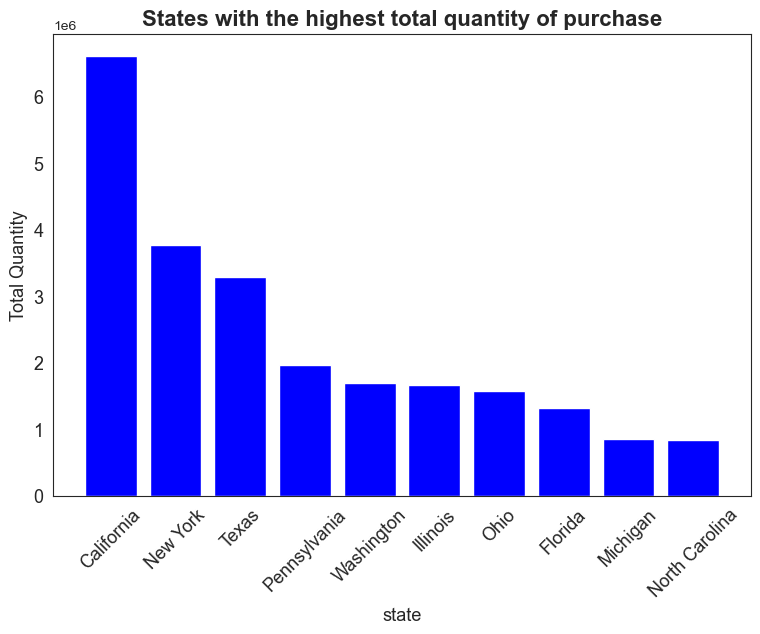

In [72]:
state_qty= data_1.groupby('state')['total_quantity'].sum().reset_index()
state_qty= pd.DataFrame(state_qty)
state_qty= state_qty.sort_values('total_quantity', ascending= False)
state_qty= state_qty.head(10)
print(state_qty)
plt.figure(figsize = (9,6))
plt.bar( x = state_qty['state'],
 height = state_qty['total_quantity'],
 color = 'blue')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('States with the highest total quantity of purchase', fontsize= 16, fontweight = 'bold')
plt.xlabel('state', fontsize = 13)
plt.ylabel('Total Quantity', fontsize = 13)
plt.show()


    region  total_quantity
3     West        10724606
1     East         9623725
0  Central         7894253
2    South         5493157


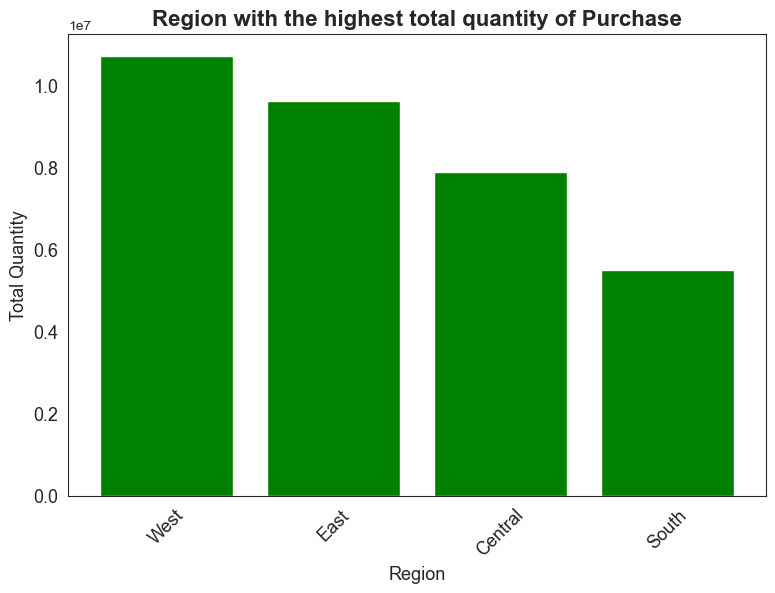

In [74]:
region_qty= data.groupby('region')['total_quantity'].sum().reset_index()
region_qty= pd.DataFrame(region_qty)
region_qty= region_qty.sort_values('total_quantity', ascending= False)
region_qty= region_qty.head(10)
print(region_qty)
plt.figure(figsize = (9,6))
plt.bar( x = region_qty['region'],
 height = region_qty['total_quantity'],
 color = 'green')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Region with the highest total quantity of Purchase', fontsize= 16, fontweight = 'bold')
plt.xlabel('Region', fontsize = 13)
plt.ylabel('Total Quantity', fontsize = 13)
plt.show()


          category  total_quantity
1  Office Supplies        22995900
0        Furniture         5443008
2       Technology         5296833


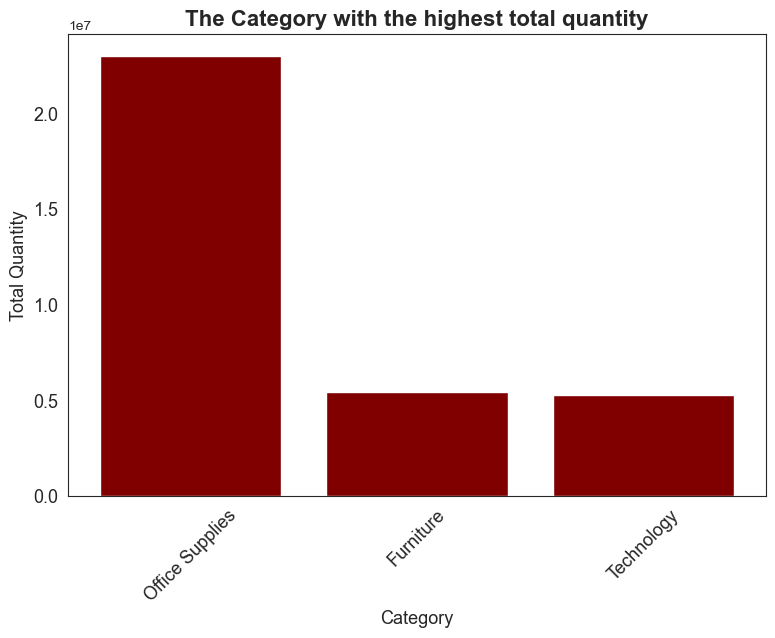

In [77]:
category_qty= data.groupby('category')['total_quantity'].sum().reset_index()
category_qty= pd.DataFrame(category_qty)
category_qty= category_qty.sort_values('total_quantity', ascending= False)
category_qty= category_qty.head(10)
print(category_qty)
plt.figure(figsize = (9,6))
plt.bar( x = category_qty['category'],
 height = category_qty['total_quantity'],
 color = 'maroon')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('The Category with the highest total quantity', fontsize= 16, fontweight = 'bold')
plt.xlabel('Category', fontsize = 13)
plt.ylabel('Total Quantity', fontsize = 13)
plt.show()

   sub_category  total_quantity
3       Binders         9087862
12        Paper         6990696
9   Furnishings         3403360
13       Phones         2923921
14      Storage         2671668
2           Art         2381820
0   Accessories         2306400
5        Chairs         1445865
1    Appliances          805714
10       Labels          506748
16       Tables          395879
7     Envelopes          230124
8     Fasteners          198338
4     Bookcases          197904
15     Supplies          122930
11     Machines           50600
6       Copiers           15912


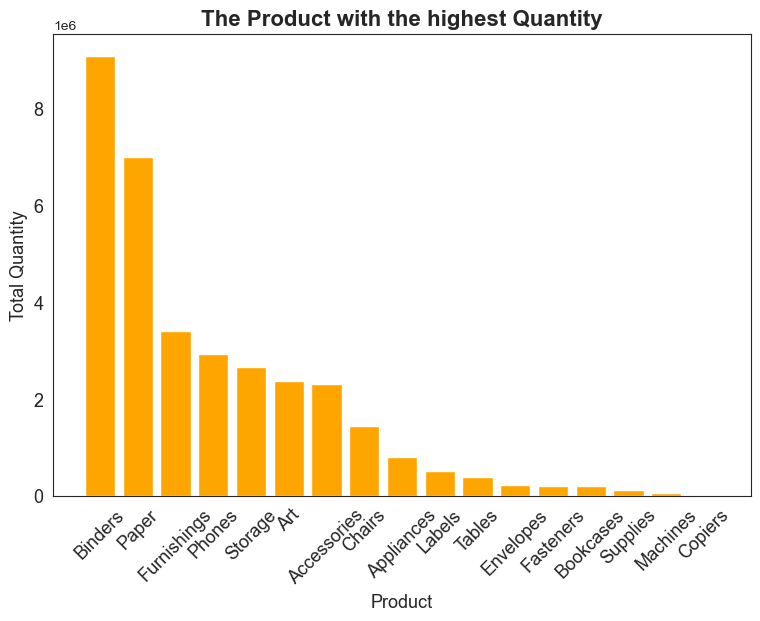

In [78]:
sub_category_qty= data.groupby('sub_category')['total_quantity'].sum().reset_index()
sub_category_qty= pd.DataFrame(sub_category_qty)
sub_category_qty= sub_category_qty.sort_values('total_quantity', ascending= False)
sub_category_qty= sub_category_qty
print(sub_category_qty)
plt.figure(figsize = (9,6))
plt.bar( x = sub_category_qty['sub_category'],
 height = sub_category_qty['total_quantity'],
 color = 'orange')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('The Product with the highest Quantity', fontsize= 16, fontweight = 'bold')
plt.xlabel('Product', fontsize = 13)
plt.ylabel('Total Quantity', fontsize = 13)
plt.show()

In [80]:
# checking the skewness of numerical featurees with the exception of the target variable
for col in data_1.select_dtypes('number').drop(columns=['total_quantity']):
 skw = data_1[col].skew()
 print(col, skw)
 print('---------------------------')
 #deskewing numerical features
 if skw > 1 or skw< -1:
     data_1[col] = np.log1p(data_1[col])
     print(' ')


disc_total_sales 4.375171043955852
---------------------------
 
quantity 1.2789977370446148
---------------------------
 
unit_sale 2.7503269458209956
---------------------------
 
disc_price 7.853525308126823
---------------------------
 


The numerical features are having high positive skew. This is due to large numbers pulling the mean
upwards. a log transformation has been carried out to deskew the numerical features

In [81]:
# checking for skewness after log transformation
for col in data_1.select_dtypes('number'):
 skw = data_1[col].skew()
 print(col, skw)
 print('---------------------------')

disc_total_sales 0.21525426832953096
---------------------------
quantity 0.1932631600138473
---------------------------
unit_sale 0.3675493252738075
---------------------------
disc_price 0.7894796326421764
---------------------------
total_quantity 0.12901455723248298
---------------------------


In [82]:
# reseting the index to match the lenght of the data frame
data_1.reset_index(drop= True, inplace= True)

In [83]:
data_1= data_1.drop(columns= ['quantity'])
data_1.head()

,ship_mode,segment,state,region,category,sub_category,disc_total_sales,unit_sale,disc_price,total_quantity
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,5.572002,4.882650,0.000000,868
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,6.597064,5.501177,0.000000,2351
2,Second Class,Corporate,California,West,Office Supplies,Labels,2.748552,2.117460,0.000000,1396
3,Standard Class,Consumer,Florida,South,Furniture,Tables,6.865450,5.855673,6.665012,1241
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,3.151368,2.706716,1.885857,3158


The data will be split into test and train sets before performing any transformation technique. This is to
avoid leakage in the test data. Performing a transformation technique on the entire data before splitting
could cause leakage - the train set getting info from the test set-

In [84]:
data_1.to_csv('modeling.csv', index= None)

## MODELING

In [85]:
# creating a data frame for the target variable
tgt_df= data[['total_quantity']]
tgt_df.head()

,total_quantity
0,868
1,2351
2,1396
3,1241
4,3158


In [88]:
# SPLITTING THE DATA INTO THE PREDICTORS AND THE TARGET. THE TARGET VARIABLE IS THE TOTAL QUAN
X= data.drop(columns=['total_quantity'])
y= tgt_df

# splitting the data set into train and test sets using train test split model
from sklearn.model_selection import train_test_split

# SETTING THE TEST SIZE TO 20%. 80% OF THE DATA WILL BE USED TO TRAIN AND 20% TO TEST
t_size= 0.2
seed= 4

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= t_size, random_state= seed)

In [89]:
# resetting the index to match the lenght of the data frame
X_train.reset_index(drop= True, inplace= True)
X_test.reset_index(drop= True, inplace= True)
y_train.reset_index(drop= True, inplace= True)
y_test.reset_index(drop= True, inplace= True)

## PREPROCESSING


To ensure model accuracy in predicting the future demand of products, the numerical features will be
normalized to have the same range, 0-1

In [91]:
# normalzing the numerical features using the normalizer algorithm
from sklearn.preprocessing import Normalizer
#instantiating algorithm
scaler= Normalizer()
# fitting the scaler to the train set only to avoid leakage
scaler.fit(X_train.select_dtypes('number'))
# transforming the train and test set
X_train_norm= scaler.transform(X_train.select_dtypes('number'))
X_test_norm= scaler.transform(X_test.select_dtypes('number'))

In [108]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6
0,0.572936,0.007092,0.000709,-0.100264,0.716170,0.358085,0.143234
1,0.631923,0.097519,0.000000,0.303323,0.631923,0.315962,0.000000
2,0.631879,0.042695,0.000000,0.315939,0.631879,0.315939,0.000000
3,0.556076,0.083120,0.000000,0.255795,0.556076,0.556076,0.000000
4,0.605513,0.024471,0.000699,0.158947,0.756891,0.108127,0.151378
...,...,...,...,...,...,...,...
7976,0.572502,0.008837,0.000884,-0.107344,0.715628,0.357814,0.143126
7977,0.665821,0.019029,0.000000,0.046607,0.665821,0.332911,0.000000
7978,0.598399,0.102466,0.002562,0.201960,0.747999,0.093500,0.149600
7979,0.580023,0.159698,0.010647,0.181257,0.725029,0.241676,0.145006


In [ ]:
# replacing the normalized numerical feature with the non - normalized features in the dataset
X_train.iloc[:, 6:13]= X_train_norm
X_test.iloc[:, 6:13]= X_test_norm
X_train.head()

array([[<Axes: title={'center': 'disc_total_sales'}>,
        <Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'discount'}>],
       [<Axes: title={'center': 'profit'}>,
        <Axes: title={'center': 'actual_total_sales'}>,
        <Axes: title={'center': 'unit_sale'}>],
       [<Axes: title={'center': 'disc_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

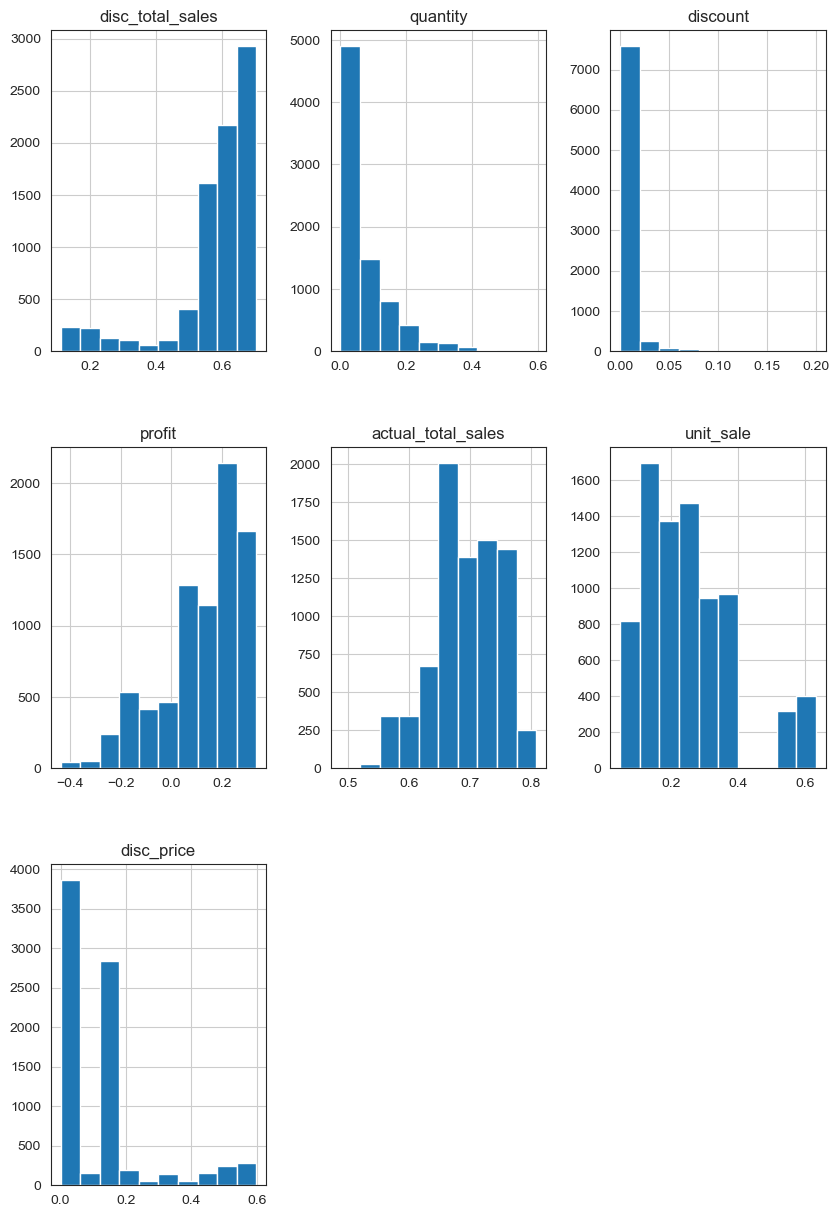

In [95]:
#checking the distribution of numerical features using a histogram plot after normalizing
X_train.hist(figsize=(10, 15))


In [96]:
X_train.describe()

,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price
count,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,0.578585,0.068645,0.003727,0.121300,0.691953,0.248119,0.113368
std,0.129199,0.082111,0.010308,0.157367,0.054454,0.136350,0.150780
min,0.110723,0.000107,0.000000,-0.435977,0.487144,0.046685,0.000000
25%,0.568170,0.009232,0.000000,0.041970,0.656927,0.142319,0.000000
50%,0.605184,0.035186,0.000105,0.175598,0.690242,0.224675,0.118196
75%,0.660508,0.102396,0.002393,0.220449,0.739138,0.327429,0.149230
max,0.704834,0.595368,0.199501,0.332896,0.808617,0.632438,0.598881


The numerical features now have a much more normal distribution - a scale between 0 to 1- this will
ensure that the model accurately captures the relationships between the predictors and the target


In [101]:
# encoding categorical features using the Onehot encoder 
import category_encoders as ce
# The one hot encoder creates a feature for each unique category and assigns 1 where it appear
#instantiating the one hot encoder
ohe = ce.OneHotEncoder(
 cols= X_train.select_dtypes('object'),
 handle_unknown= 'return_nan',
 return_df= True,
 use_cat_names= True)
#encoding the categorical variables for the train set only to avoid leakage.
ohe.fit(X_train.select_dtypes('object'))
# transforming the train and test sets
X_train_coded= ohe.transform(X_train.select_dtypes('object'))
X_test_coded= ohe.transform(X_test.select_dtypes('object'))

The .fit function that performs the encoding will not be applied for the test sets to avoid leakage. The
train and test sets would be transformed to ensure uniformity and accurate prediction

In [102]:
X_train_coded.head()

,ship_mode_Standard Class,ship_mode_Second Class,ship_mode_First Class,ship_mode_Same Day,segment_Consumer,segment_Home Office,segment_Corporate,state_Tennessee,state_Oklahoma,state_California,...,sub_category_Storage,sub_category_Accessories,sub_category_Supplies,sub_category_Machines,sub_category_Bookcases,sub_category_Tables,sub_category_Phones,sub_category_Copiers,sub_category_Envelopes,sub_category_Fasteners
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# dropping the decoded categorical features
X_train.drop(columns= X_train.iloc[:, :6], inplace= True)
X_test.drop(columns= X_test.iloc[:, :6], inplace= True)
X_train.head()

,disc_total_sales,quantity,discount,profit,actual_total_sales,unit_sale,disc_price
0,0.572936,0.007092,0.000709,-0.100264,0.716170,0.358085,0.143234
1,0.631923,0.097519,0.000000,0.303323,0.631923,0.315962,0.000000
2,0.631879,0.042695,0.000000,0.315939,0.631879,0.315939,0.000000
3,0.556076,0.083120,0.000000,0.255795,0.556076,0.556076,0.000000
4,0.605513,0.024471,0.000699,0.158947,0.756891,0.108127,0.151378


In [110]:
X_train= X_train[['disc_total_sales', 'unit_sale', 'disc_price']]
X_train.head()

,disc_total_sales,unit_sale,disc_price
0,0.572936,0.358085,0.143234
1,0.631923,0.315962,0.000000
2,0.631879,0.315939,0.000000
3,0.556076,0.556076,0.000000
4,0.605513,0.108127,0.151378


In [111]:
X_test= X_test[['disc_total_sales', 'unit_sale', 'disc_price']]
X_test.head()

,disc_total_sales,unit_sale,disc_price
0,0.561347,0.350842,0.140337
1,0.664082,0.083010,0.000000
2,0.694643,0.138929,0.000000
3,0.563657,0.352285,0.140914
4,0.590719,0.147680,0.147680


In [112]:
#combining the numerical features with the encoded categorical feature
X_train= pd.concat([X_train, X_train_coded], axis= 1)
X_test= pd.concat([X_test, X_test_coded], axis= 1)

In [113]:
X_train.head()

,disc_total_sales,unit_sale,disc_price,ship_mode_Standard Class,ship_mode_Second Class,ship_mode_First Class,ship_mode_Same Day,segment_Consumer,segment_Home Office,segment_Corporate,...,sub_category_Storage,sub_category_Accessories,sub_category_Supplies,sub_category_Machines,sub_category_Bookcases,sub_category_Tables,sub_category_Phones,sub_category_Copiers,sub_category_Envelopes,sub_category_Fasteners
0,0.572936,0.358085,0.143234,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.631923,0.315962,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.631879,0.315939,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.556076,0.556076,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.605513,0.108127,0.151378,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
X_test.head()

,disc_total_sales,unit_sale,disc_price,ship_mode_Standard Class,ship_mode_Second Class,ship_mode_First Class,ship_mode_Same Day,segment_Consumer,segment_Home Office,segment_Corporate,...,sub_category_Storage,sub_category_Accessories,sub_category_Supplies,sub_category_Machines,sub_category_Bookcases,sub_category_Tables,sub_category_Phones,sub_category_Copiers,sub_category_Envelopes,sub_category_Fasteners
0,0.561347,0.350842,0.140337,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.664082,0.083010,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.694643,0.138929,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.563657,0.352285,0.140914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.590719,0.147680,0.147680,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# importing necessary libraries for modeling
from sklearn.model_selection import RepeatedStratifiedKFold # evaluating the model
from sklearn.model_selection import cross_val_score # assigning a scoring metric
from sklearn.tree import DecisionTreeRegressor # model that captures complex relationships
from sklearn.ensemble import RandomForestRegressor # model that captures complex relationships
from sklearn.linear_model import LinearRegression # model that captures simple relationships f
from sklearn.pipeline import Pipeline # to streamline the transformation/modeling process
from sklearn.feature_selection import RFE # an algorithm for selecting features
from sklearn.linear_model import LogisticRegression# model that captures simple relationships 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


## FEATURE SELECTION AND TRAINING MODEL

In [117]:
# TRAINING THE MODEL WITH ALL FEATURES
# creating an algorithm that trains the model to predict the demand for products using KFOLD
# Creating an array for the predictors and the target
X = X_train.values
y = y_train.values[:, 0]
# putting the random state at 7 and the observations will be categorized into 10 folds
seed = 7
fold = 10
# instantiate the decision tree and random forest models
all_feat_dt = DecisionTreeRegressor(max_depth= 4, min_samples_split= 10, min_samples_leaf= 10, max_features= 5)
all_feat_rf = RandomForestRegressor(n_estimators= 300, max_depth= 3, min_samples_split= 10 , max_features= 5)
# instantiate the Kfold evaluator
kfold = RepeatedStratifiedKFold(n_splits = fold, n_repeats= 3, random_state= seed)
# using the cross validation score to assess performance using the default r2 scoring metric
dt_kf_score = cross_val_score(all_feat_dt, X, y, cv= kfold)
rf_kf_score = cross_val_score(all_feat_rf, X, y, cv= kfold)
# printing out the mean r2 percentage score for the 10 folds
print('decision tree score:',dt_kf_score.mean()*100,'%')
print('random forest score:',rf_kf_score.mean()*100,'%')

decision tree score: 23.4287828781147 %
random forest score: 36.09866883260525 %


Training a model using all of the 83 predictors results to a low performance. This indicates that there are
a lot of irrelevant features that are constituting noise in the dataset, the feature importance score will be
assessed and feature selection performed


In [125]:
X = X_train.values
y = y_train.values[:, 0]
# instantiating the random forest model
model = RandomForestRegressor()#n_estimators= 500, max_depth= 3, min_samples_split= 15, min_sa
#instantiating the RFE model
rfe = RFE(estimator= model, n_features_to_select= 5)
# selecting 4 features that have the strongest relationship with the target variable
fit = rfe.fit(X,y)
# getting the most relevant features
sel_feat = rfe.support_
# creating an empty list to store the most relevant features
feat_list = []
# extracting the most relevant features
for feat, rank in zip(list(X_train.columns), list(sel_feat)):
    if rank == True:
        feat_list.append(feat)
# creating a dataframe for the most relevant features
fiv_sel_feat = X_train[feat_list]
# adding the discounted total sales feature to the selected features
fiv_sel_feat['disc_total_sale']= X_train['disc_total_sales']
fiv_sel_feat.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9512\4216497266.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiv_sel_feat['disc_total_sale']= X_train['disc_total_sales']


,sub_category_Paper,sub_category_Furnishings,sub_category_Binders,sub_category_Storage,sub_category_Accessories,disc_total_sale
0,0.0,0.0,0.0,0.0,0.0,0.572936
1,1.0,0.0,0.0,0.0,0.0,0.631923
2,0.0,0.0,0.0,0.0,0.0,0.631879
3,1.0,0.0,0.0,0.0,0.0,0.556076
4,0.0,1.0,0.0,0.0,0.0,0.605513


The recurrent feature elimination model selects features iteratively. It randomly picks a feature at random
and set it as the target and checks the relationship with other features to determine if that relationship
affects the target variable. The RFE does that for all predictors and then selects the features that have the
strongest relationship with variables.


In [126]:
# adding the discount amount feature to the selected features
fiv_sel_feat['disc_price']= X_train['disc_price']
fiv_sel_feat.head()


C:\Users\User\AppData\Local\Temp\ipykernel_9512\3816211073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiv_sel_feat['disc_price']= X_train['disc_price']


,sub_category_Paper,sub_category_Furnishings,sub_category_Binders,sub_category_Storage,sub_category_Accessories,disc_total_sale,disc_price
0,0.0,0.0,0.0,0.0,0.0,0.572936,0.143234
1,1.0,0.0,0.0,0.0,0.0,0.631923,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.631879,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.556076,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.605513,0.151378


In [127]:
# creating an algorithm that trains the model using the selected features to predict the deman
# Creating an array for the predictors and the target

X = fiv_sel_feat.values
y = y_train.values[:, 0]

# putting the random state at 7 and the observations will be categorized into 10 folds
seed = 7
fold = 10

# instantiate the decision tree and random forest models
five_sel_dt = DecisionTreeRegressor(max_depth= 15, min_samples_split= 10, min_samples_leaf= 10, max_features= 5)
five_sel_rf = RandomForestRegressor(n_estimators= 500, max_depth= 15, min_samples_split= 10 , max_features= 5)

# instantiate the Kfold evaluator
kfold = RepeatedStratifiedKFold(n_splits = fold, n_repeats= 3, random_state= seed)

# using the cross validation score to assess performance using the default r2 scoring metric
five_sel_dt_score = cross_val_score(five_sel_dt, X, y, cv= kfold)
five_sel_rf_score = cross_val_score(five_sel_rf, X, y, cv= kfold)

# printing out the mean r2 percentage score for the 10 folds
print('decision tree score:',five_sel_dt_score.mean()*100,'%')
print('random forest score:',five_sel_rf_score.mean()*100,'%')


decision tree score: 85.75089893743703 %
random forest score: 87.05283112903521 %


In [128]:
from sklearn.metrics import mean_absolute_error

# creating an algorithm that trains the model that predicts the demand for products using KFOL

# Creating an array for the predictors and the target

X = fiv_sel_feat.values
y = y_train.values[:, 0]

# putting the random state at 7 and the observations will be categorized into 10 folds
seed = 7
fold = 10

# instantiate the decision tree and random forest models
five_sel_dt = DecisionTreeRegressor(max_depth= 4, min_samples_split= 10, min_samples_leaf= 10, max_features= 5)
five_sel_rf = RandomForestRegressor(n_estimators= 300, max_depth= 3, min_samples_split= 10 , max_features= 5)

# instantiate the Kfold evaluator
kfold = RepeatedStratifiedKFold(n_splits = fold, n_repeats= 3, random_state= seed)
from sklearn.metrics import make_scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# using the cross validation score to assess performance using the default neg_mae scoring met
five_sel_dt_score = cross_val_score(five_sel_dt, X, y, scoring=mae_scorer, cv= kfold)
five_sel_rf_score = cross_val_score(five_sel_rf, X, y, scoring=mae_scorer, cv= kfold)

# printing out the mean r2 percentage score for the 10 folds
print('decision tree score:',five_sel_dt_score.mean())
print('random forest score:',five_sel_rf_score.mean())

decision tree score: -522.5538977275677
random forest score: -578.9224124517251


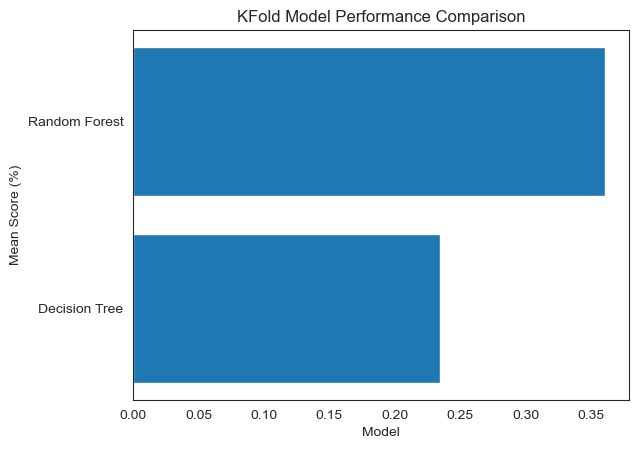

In [129]:
# plot a visual of the perfomance of both models

all_feat_kf_models = ['Decision Tree', 'Random Forest']
all_feat_kf_scores = [dt_kf_score.mean(), rf_kf_score.mean()]

plt.barh(all_feat_kf_models, all_feat_kf_scores)

plt.xlabel('Model')
plt.ylabel('Mean Score (%)')
plt.title('KFold Model Performance Comparison')

plt.show()

The models decision tree and random forest have been used for training. This is to ensure that the
complex relationships between the predictors and target are adequately captured for a more accurate
prediction. The random state is set as 7 so that the same sequence of numbers are generated whenever
we train the model to ensure reproducibility and consistent result. The model is trained using 10
folds/splits to avoid overfiting. The Kfold ensures that all the features and their significance to the target
have been collectively assessed. The results were assessed using two(2) scoring metrics, the r2 which
shows the overall accuracy of the prediction. It shows that the models fits the data with an accuracy of
over 80%. The second metric used is the mean absolute error which indicates, on average, by how much
the prediction differs from the actual values. The decision tree model performed better with an
difference -556 compared to random forest that had a difference of -617


## Testing the model

In [137]:
# creating a data frame for the rfe selected features and other relevant features that will be
t_fiv_sel_feat = X_test[['sub_category_Binders', 'sub_category_Accessories', 'sub_category_Paper',
 'sub_category_Furnishings', 'sub_category_Phones', 'sub_category_Storage', 'disc_total_sales', 'disc_price']]


the RFE algorithm selected five features that have a strong relationship with the target from the sub
categories. In addition to those, features with a high importance score - ship mode - will be added to
and the discount price will be included to enable a more accurate prediction. That is because these
features are conventionally significant is influencing the demand for products


In [138]:
# evealuating the model on the test set using the kfold cross validation with r2 scoring metri
data_arr = t_fiv_sel_feat.values

t_sel_X = data_arr
y_t = y_test.values[:, 0]

kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats= 3, random_state= seed)
t_r2_sel_dt_kf_score = cross_val_score(five_sel_dt, t_sel_X, y_t, cv= kfold)
t_r2_sel_rf_kf_score = cross_val_score(five_sel_rf, t_sel_X, y_t, cv= kfold)

print('decision tree score:',t_r2_sel_dt_kf_score.mean()*100,'%')
print('random forest score:',t_r2_sel_rf_kf_score.mean()*100,'%')

decision tree score: 81.04344151136502 %
random forest score: 78.7015627647877 %


In [139]:
t_r2_sel_dt_kf_score

array([0.80806295, 0.80935758, 0.81413172, 0.80420469, 0.79645745,
       0.77699646, 0.80649302, 0.83308279, 0.83113604, 0.82974843,
       0.8195683 , 0.80371917, 0.83308279, 0.77211038, 0.81836446])

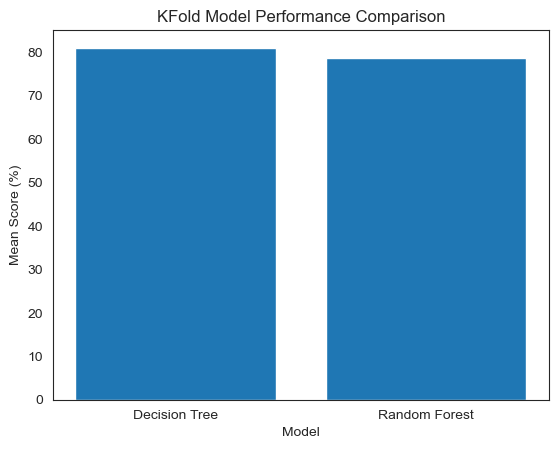

In [140]:
# plotting the performance of the model

t_kf_models = ['Decision Tree', 'Random Forest']
t_kf_scores = [t_r2_sel_dt_kf_score.mean()*100, t_r2_sel_rf_kf_score.mean()*100
              ]
plt.bar(t_kf_models, t_kf_scores)

plt.xlabel('Model')
plt.ylabel('Mean Score (%)')
plt.title('KFold Model Performance Comparison')

plt.show()

In [141]:
# predicting the target variable on a test set using the mae scoring metric

five_sel_dt.fit(t_sel_X, y_t)
five_sel_rf.fit(t_sel_X, y_t)

t_dt_yhat= five_sel_dt.predict(t_sel_X)
t_rf_yhat= five_sel_rf.predict(t_sel_X)

t_dt_mae= mean_absolute_error(y_t, t_dt_yhat)
t_rf_mae= mean_absolute_error(y_t, t_rf_yhat)

print('baseline mae:', baseline_mae)
print(' ')
print('decision tree mae:',t_dt_mae)
print('random forest mae:',t_rf_mae)


baseline mae: 1311.4665247831035
 
decision tree mae: 446.8898237934602
random forest mae: 573.3831233220596


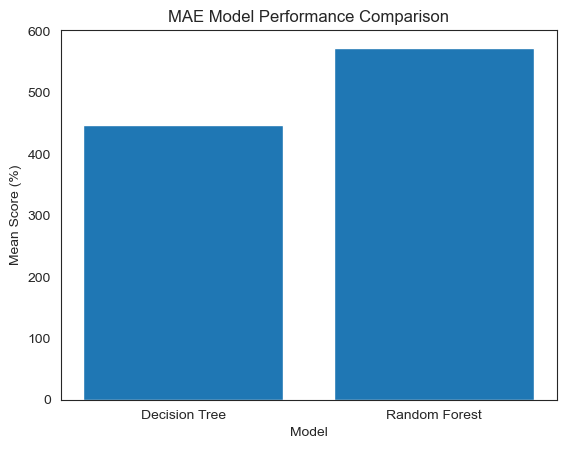

In [142]:
# plotting the performance of the model

t_mae_models = ['Decision Tree', 'Random Forest']
t_mae_scores = [t_dt_mae, t_rf_mae]

plt.bar(t_mae_models, t_mae_scores)

plt.xlabel('Model')
plt.ylabel('Mean Score (%)')
plt.title('MAE Model Performance Comparison')

plt.show()

In [143]:
feat_imp = five_sel_rf.feature_importances_
score_list = []
for col, score in zip(t_fiv_sel_feat.columns, feat_imp):
    score_list.append([col, score])
score_df = pd.DataFrame(score_list, columns= ['feature', 'score'])
score_df

,feature,score
0,sub_category_Binders,0.590256
1,sub_category_Accessories,0.000035
2,sub_category_Paper,0.310340
3,sub_category_Furnishings,0.027575
4,sub_category_Phones,0.004540
5,sub_category_Storage,0.000676
6,disc_total_sales,0.044396
7,disc_price,0.022182


In [144]:
import numpy as np
dt_test_pred_df = y_test.copy()
dt_yhat = pd.DataFrame(t_dt_yhat, columns= ['Decision_tree_yhat'])
dt_test_pred_df['Decision_tree_yhat']= dt_yhat
diff = dt_test_pred_df.total_quantity - dt_test_pred_df.Decision_tree_yhat
abs_diff= np.abs(diff)
abs_diff

0         0.000000
1       839.203455
2         0.000000
3         0.000000
4         0.000000
           ...    
1991      0.000000
1992    760.796545
1993    115.796545
1994      0.000000
1995      0.000000
Length: 1996, dtype: float64

In [145]:
# creating a data frame to store the actual values, predicted values and the absolute differen
dt_test_pred_df['abs_diff']= abs_diff
dt_test_pred_df.head()

,total_quantity,Decision_tree_yhat,abs_diff
0,5144,5144.000000,0.000000
1,1396,2235.203455,839.203455
2,3158,3158.000000,0.000000
3,5144,5144.000000,0.000000
4,5144,5144.000000,0.000000


In [146]:
# checking the distribution of the prediction for the decision tree model
dt_test_pred_df.describe()

,total_quantity,Decision_tree_yhat,abs_diff
count,1996.000000,1996.000000,1996.000000
mean,3414.390782,3414.390782,446.889824
std,1612.697121,1460.490004,517.639192
min,234.000000,2235.203455,0.000000
25%,2351.000000,2235.203455,0.000000
50%,3158.000000,2235.203455,115.796545
75%,5144.000000,5144.000000,839.203455
max,5971.000000,5971.000000,2001.203455


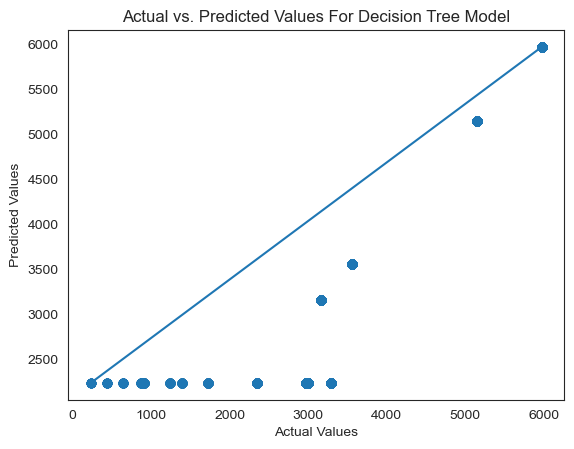

In [148]:
# plotting the actual value against the prediction to understand how the model performs for th

plt.scatter(dt_test_pred_df.total_quantity, dt_test_pred_df.Decision_tree_yhat)

# Add a 45-degree line
plt.plot([min(dt_test_pred_df.total_quantity), max(dt_test_pred_df.total_quantity)], [min(dt_test_pred_df.Decision_tree_yhat), max(dt_test_pred_df.Decision_tree_yhat)])

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values For Decision Tree Model')

plt.show()


In [149]:
# checking the absolute difference between the actual observations and the predicted values fo
import numpy as np
rf_test_pred_df = y_test.copy()
rf_yhat = pd.DataFrame(t_rf_yhat, columns= ['Random_forest_yhat'])
rf_test_pred_df['Random_forest_yhat']= rf_yhat
rf_diff = rf_test_pred_df.total_quantity - rf_test_pred_df.Random_forest_yhat
rf_abs_diff= np.abs(rf_diff)
rf_abs_diff

0        205.849701
1       1135.528140
2        599.479135
3        209.248724
4        215.048557
           ...     
1991     224.236423
1992     508.962410
1993     167.686683
1994     600.891399
1995     489.129812
Length: 1996, dtype: float64

In [150]:
# creating a data frame to store the actual values, predicted values and the absolute differen
rf_test_pred_df['rf_abs_diff']= rf_abs_diff
rf_test_pred_df

,total_quantity,Random_forest_yhat,rf_abs_diff
0,5144,4938.150299,205.849701
1,1396,2531.528140,1135.528140
2,3158,2558.520865,599.479135
3,5144,4934.751276,209.248724
4,5144,4928.951443,215.048557
...,...,...,...
1991,5971,5746.763577,224.236423
1992,2996,2487.037590,508.962410
1993,2351,2518.686683,167.686683
1994,3158,2557.108601,600.891399


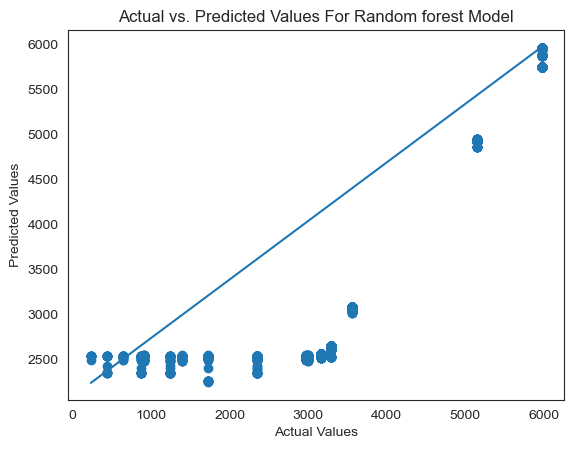

In [151]:
# plotting the actual value against the prediction to understand how the model performs for th
plt.scatter(rf_test_pred_df.total_quantity, rf_test_pred_df.Random_forest_yhat)

# Add a 45-degree line
plt.plot([min(rf_test_pred_df.total_quantity), max(rf_test_pred_df.total_quantity)], [min(dt_test_pred_df.Decision_tree_yhat), max(dt_test_pred_df.Decision_tree_yhat)])

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values For Random forest Model')

# Show the plot
plt.show()


## SUMMARY AND FINDINGS
The goal of this analysis and modeling is the prediction of future demand for product optimization with
the following objectives:


1. Preventing stockout
2. Preventing lost sales
3. Preventing increased inventory cost


From the analysis and prediction, the following finding were made:
1. There was no correlation between the sales price and quantity purchased
2. The discount given for the purchase had a little impact on the overall sales
3. The decision tree and random forest model both adequately explain how the model captures and
fits the data with an accuracy of 80%
4. The models were off, on average, by 350 for the prediction of total quantity beating a baseline of
1295

## TECHNICAL DEEPDIVE


The following new features were created to get a better understanding of the data, capture relationships
and get an accurate prediction:

    
1. Actual total sales - The total sales for every purchase before the discount was applied
2. unit sale - the unit price for each product
3. Discount price - The discount amount on the total sales for every purchase


Other steps taken include:


1. The dataset was segmented by category, segment, sub category and ship mode and each segment
was analyzed
2. There were a few products with very high total sales
3. The distibution of numerical features were imbalanced and these features were deskwed and
normalized
4. Categorical features were encoded using the OneHotEncodre algorithm
5. The Recurrent feature elimination algorithm was used to select features that were relevant for the
prediction

The following models were used to train the data to predict future demand:

1. Decision tree - The decision tree model is capable of handling complex, non - linear relationships,
such as the relationship between various products, their prices and the quantity purchased. The
decision tree consists of several node. Each node consists of a number of features that are randomly
selected. The model checks the relationship between each node and the target variable and trains
the model using the best best features selected from different nodes with a tree depth of 10, min
sample node of 10, min sample, and max features of 5 for the leaf node.
2. Random forest - The random forest model is also capable of handling complex, non - linear
relationships, such as the relationship between various products, their prices and the quantity
purchased. It is an ensemble technique where the model consists of many decision trees as against
a single one. It averages the results from all trees to obtain the final prediction. A number 0f 500
trees were used in the forest, with a tree depth of 10, min sample node of 10, min sample, and max
features of 5 for the leaf node.

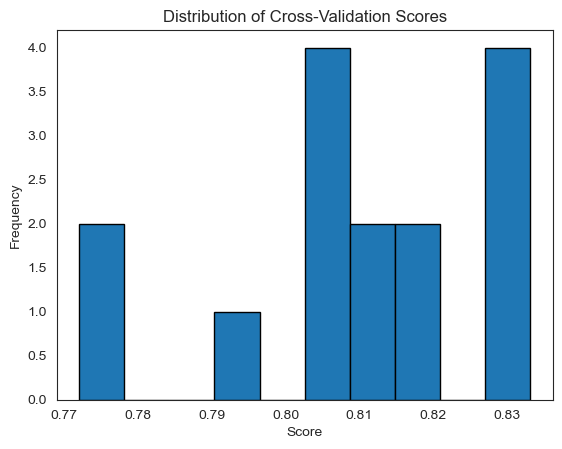

In [152]:
plt.hist(t_r2_sel_dt_kf_score, bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Cross-Validation Scores')
plt.show()

From the KFold score, it is observed that most of the score fall between 84% and 85% with the lowest
score at 81% and The scores are relatively spread out, indicating some variability in the model's
performance across different folds. Overall, the model's performance is good.


the R square accuracy scoring metric and Mean absolute error were used to evaluate the model. The R
squared measures how well the model captures the relationship between the target and the predictors.
The model was able to capture 85% of the relationship between the target and the predictor


the mean absolute error measures, on average, by how much the prediction deviates from the actual
values. We got a mean absolute error of 323

In [153]:
feat_imp = five_sel_rf.feature_importances_
score_list = []
for col, score in zip(t_fiv_sel_feat.columns, feat_imp):
    score_list.append([col, score])
score_df = pd.DataFrame(score_list, columns= ['feature', 'score'])
score_df

,feature,score
0,sub_category_Binders,0.590256
1,sub_category_Accessories,0.000035
2,sub_category_Paper,0.310340
3,sub_category_Furnishings,0.027575
4,sub_category_Phones,0.004540
5,sub_category_Storage,0.000676
6,disc_total_sales,0.044396
7,disc_price,0.022182


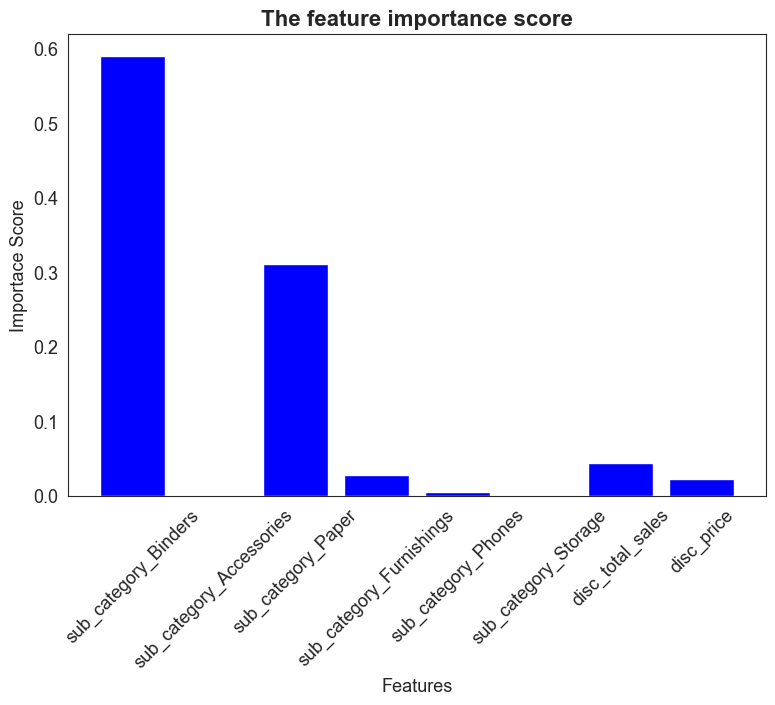

In [154]:
plt.figure(figsize = (9,6))
plt.bar( x = score_df['feature'],
 height = score_df['score'],
 color = 'blue')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('The feature importance score', fontsize= 16, fontweight = 'bold')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Importace Score', fontsize = 13)
plt.show()

The feature importance score shows that the products Binders and paper has the strongest influence in
predicting the target with a score of 50% and 33% respectively. These are the products having a
significant impact. This is likely because these features had the highest number of purchase


From the analysis and modeling, the following bias and limitations were highlighted:


1. The model only captures the relationship between the target and some products excluding others
2. This indicates that during prediction, the model will have a higher accuracy when predicting the
demand for these products and a lower accuracy when predicting the demand of others
3. The data used to train the model was insufficient, more data will be needed to improve the model's
accuracy
4. The model does not capture external relationship that influence demand such as competition,
inflation, seasonality and economic trend